# Classifiers introduction

In the following program we introduce the basic steps of classification of a dataset in a matrix

Import the package for learning and modeling trees

In [1]:
from sklearn import tree 
from sklearn.model_selection import train_test_split
from sklearn.utils import Bunch
import sklearn as sklearn
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import graphviz

eval_metrics={}


def print_evaluations(metrics):
    """Utility function to print a dctionary of metrics"""
    for dataset, metrics in eval_metrics.items():
        msg = "Model trained on {} dataset. Accuracy score: {:.4f}. "
        if 'f1-measure' in metrics:
            msg += "f1 score: {:0.4f}".format(metrics['f1-measure'])
        print(msg.format(dataset, metrics['accuracy']))
        
# Matplotlib global setup 
setosa_color = mpl.colors.to_rgb('#eb4d4b')
versicolor_color = mpl.colors.to_rgb('#686de0')
virginica_color = mpl.colors.to_rgb('#badc58')

target_colors = [setosa_color,versicolor_color,virginica_color]

Define the matrix containing the data (one example per row)
and the vector containing the corresponding target value

In the following we start using a dataset (from UCI Machine Learning repository)

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

## Learn a Tree with default configuration

In [3]:
X_train, X_test, y_train, y_test  = train_test_split(iris.data,iris.target,test_size=0.25)

clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5)
clf.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5,
                       random_state=300)

## Model evaluation predictions

In [4]:
# apply fitted model "clf" to the test set 

predictions = clf.predict(X_test)
# print the predictions (class numbers associated to classes names in target names)
print("Predictions:")
print(predictions)
print("True classes:")
print(y_test) 

# print some metrics results
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
acc_score = accuracy_score(y_test, predictions)
f1=f1_score(y_test, predictions, average='macro')


eval_metrics['iris']={'accuracy':acc_score,'f1-measure':f1}
print_evaluations(eval_metrics)

Predictions:
[1 2 1 2 0 0 2 0 0 2 0 1 0 2 0 2 0 2 1 0 2 1 0 1 2 2 0 2 2 0 2 2 0 1 0 1 0
 0]
True classes:
[1 2 1 1 0 0 2 0 0 2 0 1 0 2 0 2 0 2 1 0 2 1 0 1 1 2 0 1 2 0 2 1 0 1 0 1 0
 0]
Model trained on iris dataset. Accuracy score: 0.8947. f1 score: 0.8778


# Show the tree 

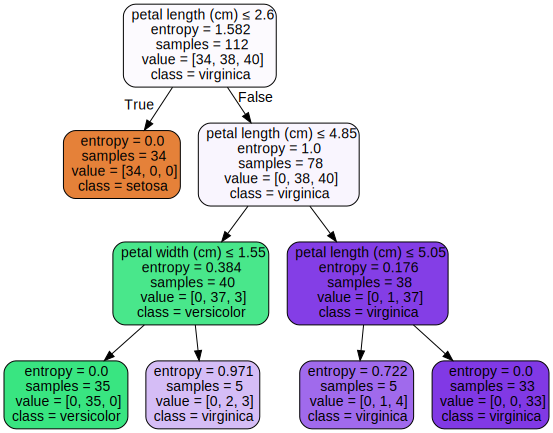

In [5]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names, 
                         class_names=iris.target_names, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

# Exercise \#1: Artificial Inflation on training set

In [6]:
INFLATION_REPETITIONS = 10

iris_stacked = np.column_stack((X_train,y_train)) # merge together features and labels columnwisely

# get indeces for the specified classes
virginica_indeces = np.where(iris_stacked[:,4]==1) # versicolor
versicolor_indeces = np.where(iris_stacked[:,4]==2) # virginica

# get instances for the specified classes
virginica = iris_stacked[virginica_indeces]
versicolor = iris_stacked[versicolor_indeces]

# inflating
virginica = np.repeat(virginica, INFLATION_REPETITIONS, axis=0)
versicolor = np.repeat(versicolor, INFLATION_REPETITIONS, axis=0)

# merging
inflated_iris = np.row_stack((iris_stacked, virginica, versicolor))

### Visualize class distribution

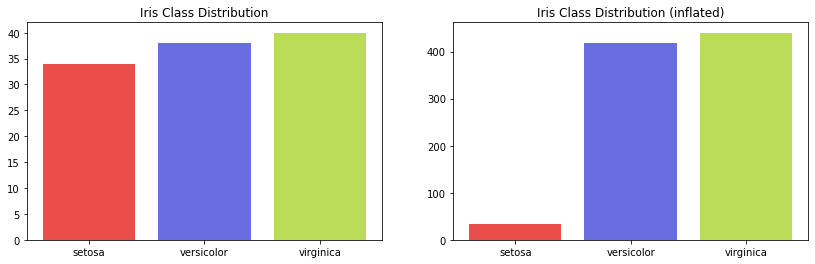

In [7]:
# plot class distributions
fig, axes = plt.subplots(1,2,figsize=(14,4))

class_distrib = np.bincount(iris_stacked[:,4].astype(np.int))
inflated_class_distrib = np.bincount(inflated_iris[:,4].astype(np.int))

bins=[0,1,2]
axes[0].bar(bins, class_distrib, tick_label=iris.target_names, color=[setosa_color,versicolor_color,virginica_color])
axes[0].set_title("Iris Class Distribution");


axes[1].bar(bins, inflated_class_distrib, tick_label=iris.target_names, color=[setosa_color,versicolor_color,virginica_color])
axes[1].set_title("Iris Class Distribution (inflated)");

### Train and Evaluate on Inflated Dataset

Evaluating the model with the augmented dataset, virginica and versicolor' istances are 10 times more than the original iris dataset. The model evaluation is executed with 10-fold cross validation

In [8]:
# train and evaluate on inflated iris
inflated_X_train = inflated_iris[:,0:4] # 0 to 3 are features columns
inflated_y_train = inflated_iris[:,4] # target column

clf.fit(inflated_X_train,inflated_y_train)
predictions = clf.predict(X_test)

acc_score = accuracy_score(y_test, predictions)
f1=sklearn.metrics.f1_score(y_test, predictions, average='macro')

eval_metrics['inflated-iris']={'accuracy':acc_score,'f1-measure':f1}

print_evaluations(eval_metrics)

Model trained on iris dataset. Accuracy score: 0.8947. f1 score: 0.8778
Model trained on inflated-iris dataset. Accuracy score: 0.9474. f1 score: 0.9394


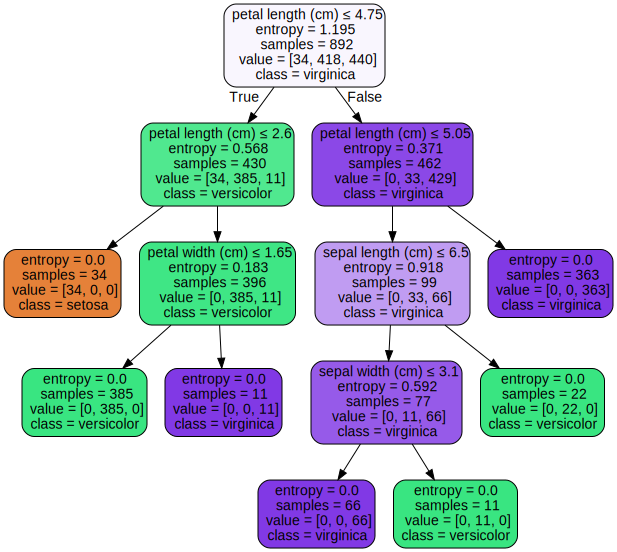

In [9]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names, 
                         class_names=iris.target_names, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

## Modify class weights

In [10]:
class_weights = {0:1, 1:10, 2:10}

clf_weighted = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight=class_weights)
clf_weighted.fit(X_train,y_train)
predictions = clf_weighted.predict(X_test)

acc_score = accuracy_score(y_test, predictions)
f1=sklearn.metrics.f1_score(y_test, predictions, average='macro')

eval_metrics['iris (class weighted)']={'accuracy':acc_score,'f1-measure':f1}

print_evaluations(eval_metrics)

Model trained on iris dataset. Accuracy score: 0.8947. f1 score: 0.8778
Model trained on inflated-iris dataset. Accuracy score: 0.9474. f1 score: 0.9394
Model trained on iris (class weighted) dataset. Accuracy score: 0.9211. f1 score: 0.9089


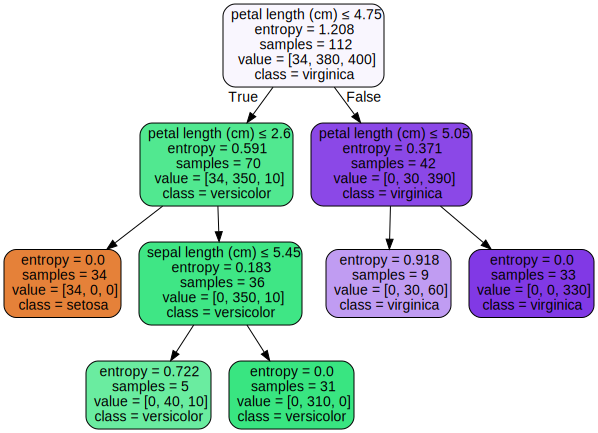

In [11]:
dot_data = tree.export_graphviz(clf_weighted, out_file=None, 
                         feature_names=iris.feature_names, 
                         class_names=iris.target_names, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

## Hyperparameters Optimization

To find the best combination of hyperparameter we apply an *exhaustive search* over the *parameter space*.

In [12]:
params = {'max_depth':np.arange(2,20,2),
          'min_samples_split':np.arange(2,10,2),
          'min_samples_leaf':np.arange(1,10),
          'max_leaf_nodes':np.arange(1,15,2),
          'min_impurity_decrease':np.linspace(0,1,11)}
                                     
clf = sklearn.model_selection.GridSearchCV(sklearn.tree.DecisionTreeClassifier(),params,
                                           scoring=['accuracy'],n_jobs=4,
                                           refit='accuracy',cv=4)
clf.fit(X_train,y_train);

In [13]:
best_clf = clf.best_estimator_
predictions = best_clf.predict(X_test)

acc_score = accuracy_score(y_test, predictions)
f1=sklearn.metrics.f1_score(y_test, predictions, average='macro')

eval_metrics['iris (hyperparams optimization)']={'accuracy':acc_score,'f1-measure':f1}
print_evaluations(eval_metrics)

Model trained on iris dataset. Accuracy score: 0.8947. f1 score: 0.8778
Model trained on inflated-iris dataset. Accuracy score: 0.9474. f1 score: 0.9394
Model trained on iris (class weighted) dataset. Accuracy score: 0.9211. f1 score: 0.9089
Model trained on iris (hyperparams optimization) dataset. Accuracy score: 0.9211. f1 score: 0.9089


## Confusion Matrix

Text(0.5, 1.0, 'Decision tree with optimized params')

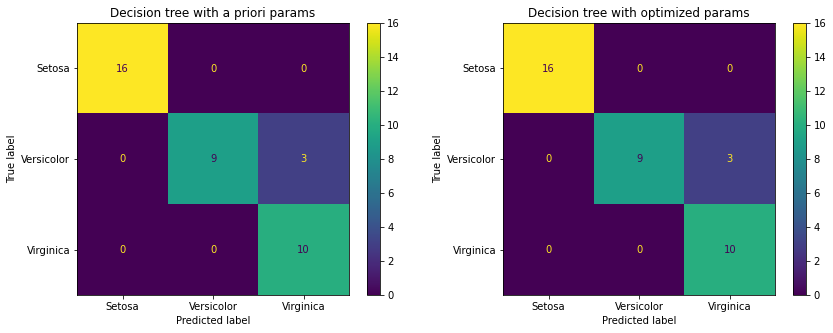

In [14]:
fig, axes = plt.subplots(1,2,figsize=(14,5))

sklearn.metrics.plot_confusion_matrix(best_clf,X_test,y_test,display_labels=['Setosa','Versicolor','Virginica'],ax=axes[1])
sklearn.metrics.plot_confusion_matrix(clf,X_test,y_test,display_labels=['Setosa','Versicolor','Virginica'],ax=axes[0])

axes[0].set_title('Decision tree with a priori params')
axes[1].set_title('Decision tree with optimized params')

# Build Trees in Coverage and ROC Spaces
Coverage and roc plot are natural suitable for *binary classifiers*. To extend to a multiclass case we apply a *one-vs-rest* scheme.
Essentially we construct $K$ **binary** classifiers, and in turn we fit the $i$-th classifier to a traning set where instances of class $C_i$ are mapped to the *positive class* and the remaing intstances of class $C_j \ i\neq j$ are mapped to the *negative class*.

In [15]:
from sklearn.multiclass import OneVsRestClassifier

clf = sklearn.tree.DecisionTreeClassifier(criterion="entropy",random_state=300,
                                                           min_samples_leaf=3, min_impurity_decrease=0.0,
                                                           max_depth=3, max_leaf_nodes=4)
ovr_clf = OneVsRestClassifier(clf)
ovr_clf.fit(X_train,y_train);

We can access to the binary classfiers of OneVSRest, so we visualize the decision tree associated.

In [16]:
for i, treez in enumerate(ovr_clf.estimators_):
    class_name = iris.target_names[i]
    print(class_name)
    graph = graphviz.Source( tree.export_graphviz(treez,out_file=None,filled=True, feature_names=iris.feature_names, class_names=iris.target_names) ) 
    graph.render("Tree {}".format(iris.target_names[i]))
    graph.view()

setosa
versicolor
virginica


To build the coverage and roc curves, we follow the pseudo algorithm written in [Peter Flach's book](https://www.cambridge.org/core/books/machine-learning/621D3E616DF879E494B094CC93ED36A4):
* Access the "local probability distribution" contained in the decision tree' leves. (computed by `get_leaves` function)
* Compute the *empirical probability of the positive class* with *laplace smoothing*
$$
\dot{p}=\frac{n^+ +1}{n^+ + n^- +2}
$$
* Rank the leaves in **decreasing** order by empirical probability
* Each point $(x,y)$ in the coverage space is given by the **ranked leaves** cumulative TP and FP:
$$ (x,y) = (TP,FP) $$ instead for the roc curve: 
$$(x,y) = (\frac{TP}{POS},\frac{FP}{NEG})$$ 
The last 3 points are computed by `get_coverage_curve` and `get_roc_curve` functions.

In [17]:
def get_leaves(tree):
    """
    return mask of leaves indeces (eg. [True,False,True] means that first and last nodes in the tree are leaves)
    and leaves values -> a 2d array of [[a,b],[c,d]] where a,c are negative class instances in the respective nodes, b,d positive ones.
    """
    n_nodes = tree.tree_.node_count
    children_left = tree.tree_.children_left
    children_right = tree.tree_.children_right

    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=np.bool)
   
    stack = [(0, -1)]  # seed is the root node id and its parent depth
    while len(stack) > 0:
        node_id, parent_depth = stack.pop()
        node_depth[node_id] = parent_depth + 1

        # If we have a test node
        if (children_left[node_id] != children_right[node_id]):
            stack.append((children_left[node_id], parent_depth + 1))
            stack.append((children_right[node_id], parent_depth + 1))
        else:
            is_leaves[node_id] = True
    
    return is_leaves, np.squeeze(tree.tree_.value[is_leaves],axis=1)

def get_coverage_curve(estimator):

    _, leaves = get_leaves(estimator) #get leaves

    empirical_proba = (leaves[:,1] +1)/ (np.sum(leaves,axis=1) +2) # compute empirical probabilities (positive class instances / total instances)

    ind = np.argsort(empirical_proba)[::-1] # return the indices that makes empirical_proba sorted in descending order
    
    coverage_points = np.cumsum(leaves[ind],axis=0) # get the actual point in coverage space
    coverage_points = np.row_stack(([0,0],coverage_points)) ## add a "dummy" origin point
    
    return coverage_points



def get_roc_curve(estimator):

    _, leaves = get_leaves(estimator) #get leaves

    empirical_proba = (leaves[:,1] +1)/ (np.sum(leaves,axis=1) +2) # compute empirical probabilities (positive class instances / total instances)

    ind = np.argsort(empirical_proba)[::-1] # return the indices that makes empirical_proba sorted in descending order
    
    coverage_points = np.cumsum(leaves[ind],axis=0) # get the actual point in coverage space
    coverage_points = np.row_stack(([0,0],coverage_points)) # add a "dummy" origin point
    
    roc_points = coverage_points / np.sum(leaves,axis=0) # normalize (TP/POS and FP /NEG)
    
    return roc_points

### Coverage Space

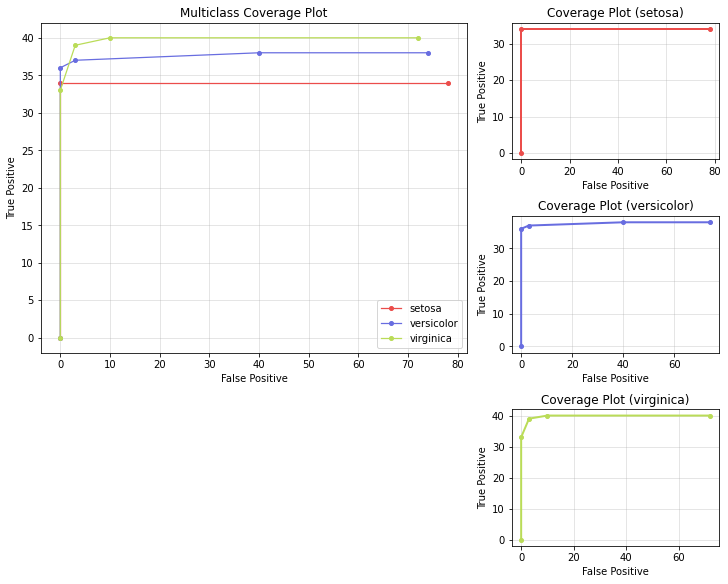

In [18]:
fig= plt.figure(figsize=(10,8),constrained_layout=True)

gs=fig.add_gridspec(3,3)
main_ax=fig.add_subplot(gs[:2,0:2])
setosa_ax = fig.add_subplot(gs[0,2])
versicolor_ax = fig.add_subplot(gs[1,2])
virginica_ax = fig.add_subplot(gs[2,2])

axes=[setosa_ax,versicolor_ax,virginica_ax]

for treeclf,ax,class_name,color in zip(ovr_clf.estimators_,axes,iris.target_names,target_colors):
    points = get_coverage_curve(treeclf)
   
    ax.plot(points[:,0], points[:,1], marker='o', markersize=4, linewidth=2, c=color)
    ax.set_xlabel('False Positive')
    ax.set_ylabel('True Positive')
    ax.set_title('Coverage Plot ({})'.format(class_name))
    ax.grid(True,alpha=0.4)
    
    main_ax.plot(points[:,0], points[:,1],  marker='o', markersize=4, linewidth=1.25, c=color,label=class_name)
    
main_ax.set_xlabel('False Positive')
main_ax.set_ylabel('True Positive')
main_ax.set_title('Multiclass Coverage Plot')
main_ax.grid(True,alpha=0.4)
main_ax.legend();

### ROC Space

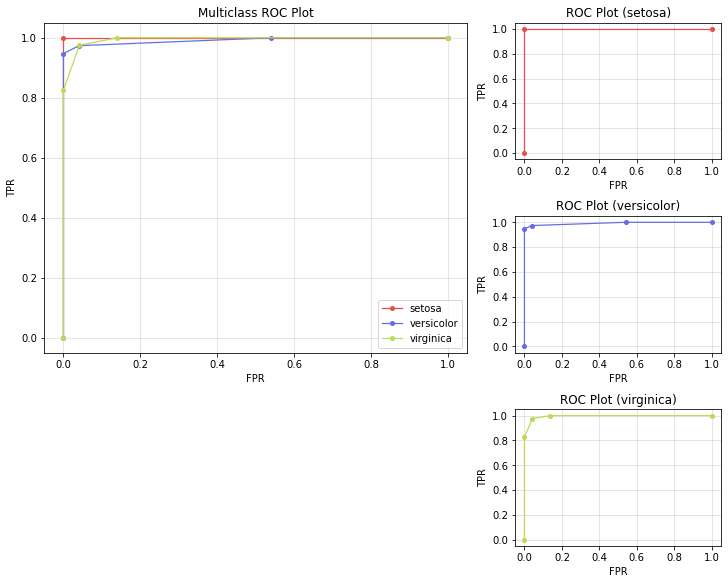

In [19]:
fig= plt.figure(figsize=(10,8),constrained_layout=True)

gs=fig.add_gridspec(3,3)
main_ax=fig.add_subplot(gs[:2,0:2])
setosa_ax = fig.add_subplot(gs[0,2])
versicolor_ax = fig.add_subplot(gs[1,2])
virginica_ax = fig.add_subplot(gs[2,2])


axes=[setosa_ax,versicolor_ax,virginica_ax]

for treeclf,ax,class_name,color in zip(ovr_clf.estimators_,axes,iris.target_names,target_colors):
    points = get_roc_curve(treeclf)
   
    ax.plot(points[:,0], points[:,1], marker='o', markersize=4, linewidth=1.25, c=color)
    ax.set_xlabel('FPR')
    ax.set_ylabel('TPR')
    ax.set_title('ROC Plot ({})'.format(class_name))
    ax.grid(True,alpha=0.4)
    
    main_ax.plot(points[:,0], points[:,1],  marker='o', markersize=4, linewidth=1.25, c=color,label=class_name)
    
main_ax.set_xlabel('FPR')
main_ax.set_ylabel('TPR')
main_ax.set_title('Multiclass ROC Plot')
main_ax.grid(True,alpha=0.4)
main_ax.legend();